In [1]:
#for analysis

import numpy as np 
import pandas as pd

# for vizualization

import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

*The data is already cleaned .*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.drop(["CustomerID"],axis=1,inplace = True)

In [8]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## visualisation 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



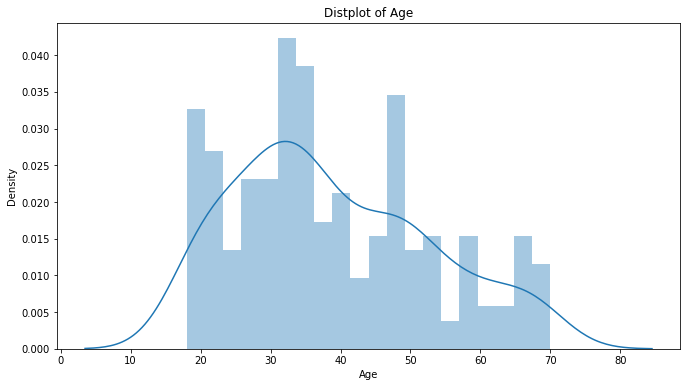

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



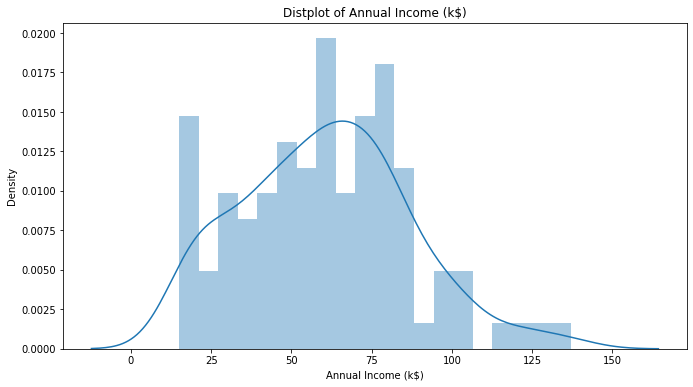

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



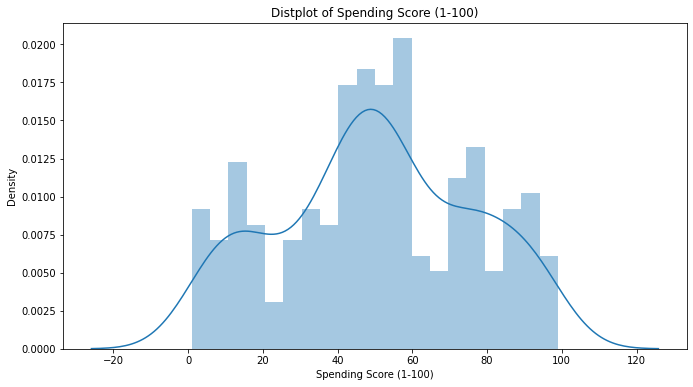

In [9]:

n = 0
for x in ["Age" , 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1 
    plt.figure(2,figsize = (38,6))
    plt.subplot(1,3,n)

    sns.distplot(df[x],bins = 20)
    plt.title('Distplot of {}'.format(x))
    plt.show()

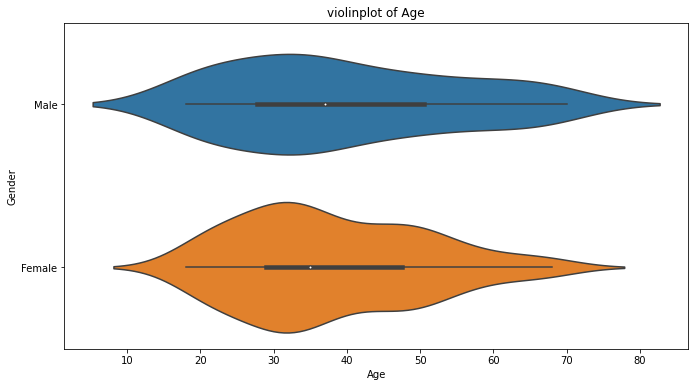

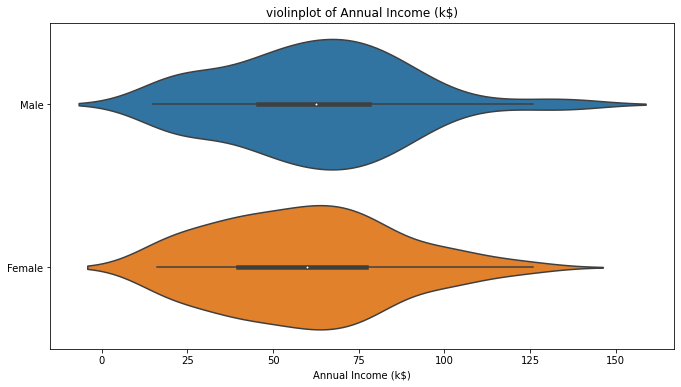

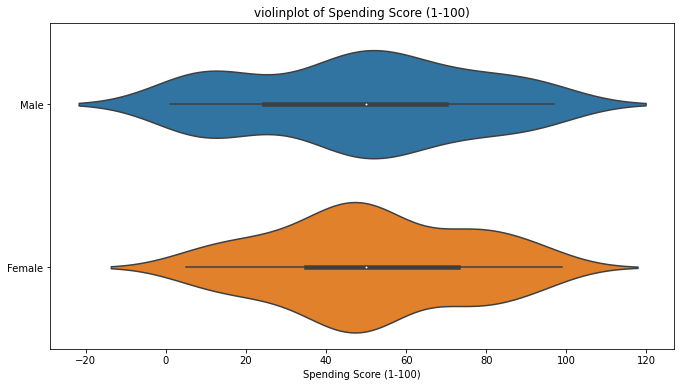

In [10]:
n = 0
for x in ["Age" , 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1 
    plt.figure(1,figsize = (38,6))
    plt.subplot(1,3,n)
    sns.violinplot(x = x,y = "Gender",data = df)
    plt.ylabel("Gender" if n == 1 else '')
    plt.title('violinplot of {}'.format(x))
    plt.show()

In [11]:
import plotly.express as px

fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", facet_col="Gender",
                 width=1000, height=600)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [12]:

fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)',color="Gender",width=1000, height=600)
fig.update_layout(title='Annual Income (k$) Vs Spending Score (1-100) With Gender ',
                  xaxis_title="Annual Income (k$)",yaxis_title="Spending Score (1-100) ",title_x=0.5)
fig.show()

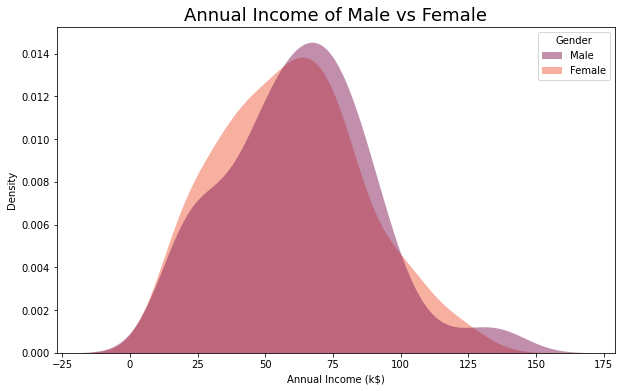

In [13]:
plt.figure(figsize=(10,6))
sns.kdeplot(
   data=df, x="Annual Income (k$)", hue="Gender",
   fill=True, common_norm=False, palette="rocket",
   alpha=.5, linewidth=0,
)

plt.title('Annual Income of Male vs Female', fontsize=18)
plt.show()

**Clustering**

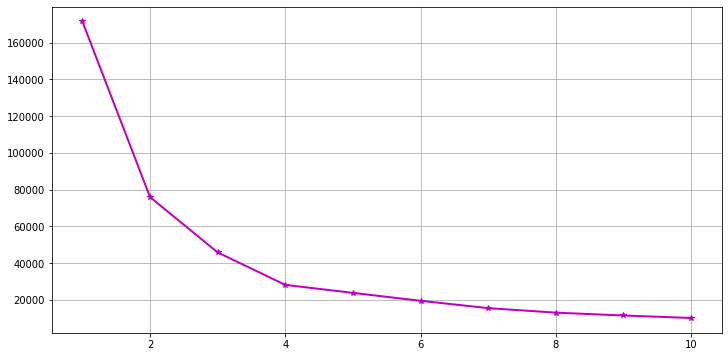

In [14]:
x1 = df.loc[:,["Age" , "Spending Score (1-100)"]].values

WCSS = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = "k-means++")
    kmeans.fit(x1)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),WCSS,linewidth = 2,color="m",marker="*")

In [15]:
kmeans.inertia_

10159.386310994358

In [16]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)
print(label)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [17]:
kmeans.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

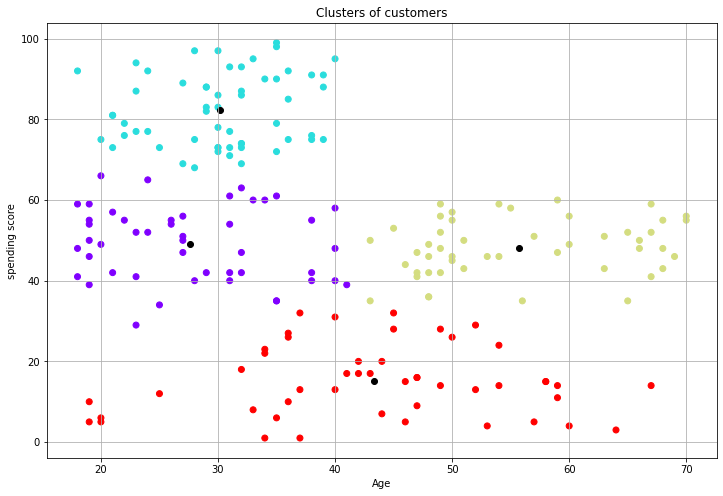

In [18]:
plt.figure(1,figsize = (12,8))
plt.grid()
plt.scatter(x1[:,0],x1[:,1],c = kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "k")
plt.xlabel("Age")
plt.ylabel("spending score")
plt.title("Clusters of customers")
plt.show()

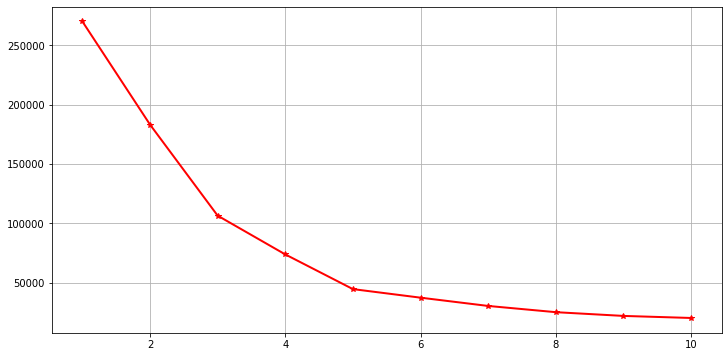

In [19]:
x2 = df.loc[:,["Annual Income (k$)" , "Spending Score (1-100)"]].values

WCSS = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = "k-means++")
    kmeans.fit(x2)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),WCSS,linewidth = 2,color="red",marker="*")

In [20]:
kmeans1 = KMeans(n_clusters=5)
label = kmeans1.fit_predict(x2)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


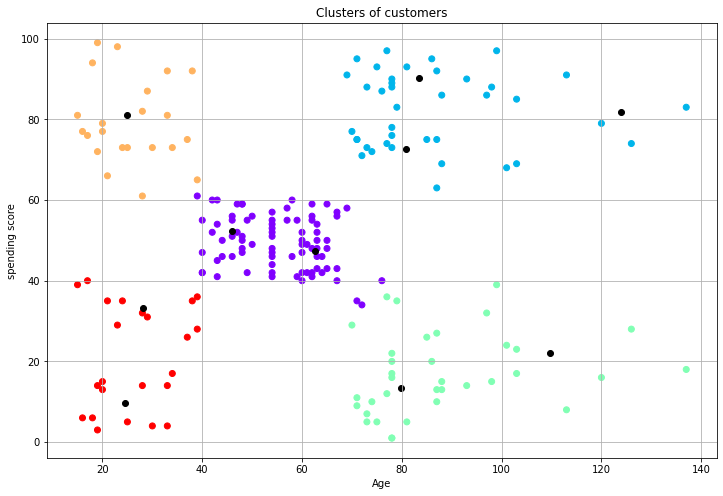

In [21]:
plt.figure(1,figsize = (12,8))
plt.grid()
plt.scatter(x2[:,0],x2[:,1],c = kmeans1.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "k")
plt.xlabel("Age")
plt.ylabel("spending score")
plt.title("Clusters of customers")
plt.show()

In [22]:
x3 = df.iloc[:,1:]
x3

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


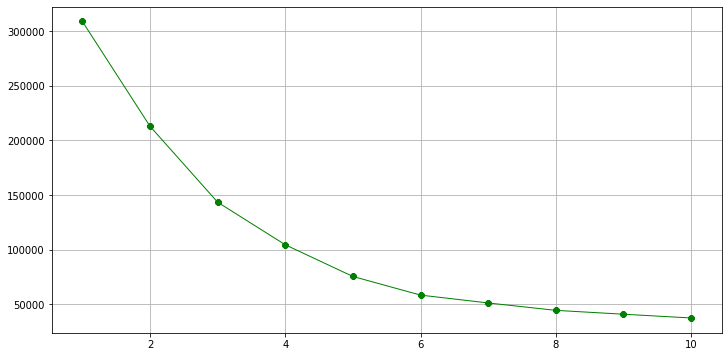

In [23]:
WCSS = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = "k-means++")
    kmeans.fit(x3)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),WCSS,linewidth = 1,color="green",marker="8")

In [24]:
kmeans2 = KMeans(n_clusters=5)
label = kmeans2.fit_predict(x3)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [25]:
kmeans2.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [25.52173913, 26.30434783, 78.56521739],
       [40.66666667, 87.75      , 17.58333333]])

In [26]:
clusters = kmeans2.fit_predict(x3)
df["label"] = clusters

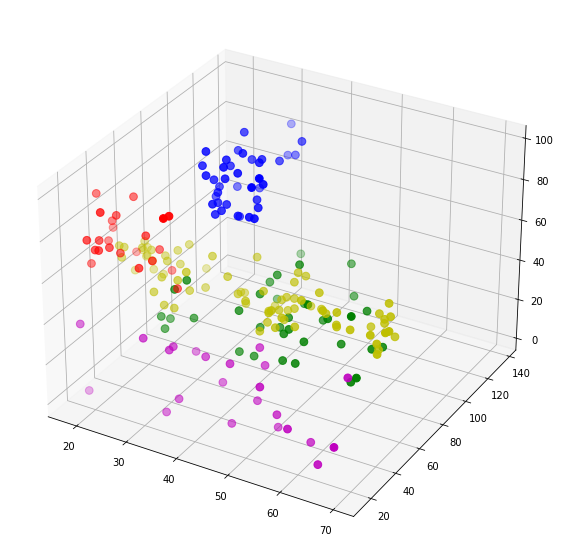

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df.Age[df.label == 0] , df["Annual Income (k$)"][df.label == 0] , df["Spending Score (1-100)"][df.label == 0],c = "r",s=60)
ax.scatter(df.Age[df.label == 1] , df["Annual Income (k$)"][df.label == 1] , df["Spending Score (1-100)"][df.label == 1],c = "y",s=60)
ax.scatter(df.Age[df.label == 2] , df["Annual Income (k$)"][df.label == 2] , df["Spending Score (1-100)"][df.label == 2],c = "b",s=60)
ax.scatter(df.Age[df.label == 3] , df["Annual Income (k$)"][df.label == 3] , df["Spending Score (1-100)"][df.label == 3],c = "g",s=60)
ax.scatter(df.Age[df.label == 4] , df["Annual Income (k$)"][df.label == 4] , df["Spending Score (1-100)"][df.label == 4],c = "m",s=60)


*The same plot in a interactive way*

In [28]:
fig = px.scatter_3d(df, x=df.Age, y=df["Annual Income (k$)"], z=df["Spending Score (1-100)"],
              symbol='label',size='label', size_max=18,color = 'label',
              opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()